### Importing Libraries

In [18]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings 
warnings.filterwarnings('ignore')


### Loading Scraped Data From Flipkart.com
https://github.com/Dawood006/Web-Scrape/blob/bd647c7e8254a8f7f33e01f3e15fe3bb2c42fc30/Flipkart%20Laptops/Laptop_web_scrape.ipynb

In [20]:
file_path = "lappy2.csv"  
df = pd.read_csv(file_path)

### 15 key features based on their correlation with the target (Price) variable while maintaining predictive accuracy are Selected 
##### Converted all the possible and relevant Data to numberic (All the steps mentioned in the below attached file 👇)
https://github.com/Dawood006/Laptop-Price-Benchmark-App/blob/506dd8a19f6c541094705f48c8d735e95517ef82/Linear%20model/Data_Cleaning%20%26%20Linear_pred.ipynb

#### Correaltion with Price >>
| Feature                                    | Value      |
|--------------------------------------------|-----------:|
| Finger Print Sensor                        |  0.015237  |
| MS Office Provided                         |  0.113146  |
| Backlit Keyboard                           |  0.297286  |
| Touchscreen                                |  0.197142  |
| Face Recognition                           |  0.017621  |
| Number of Cores                            |  0.464083  |
| Rating                                     |  0.237274  |
| Price                                      |  1.000000  |
| RAM (GB)                                   |  0.766697  |
| RAM Type Rank                              |  0.566023  |
| Domestic Warranty_in_year                  |  0.044794  |
| SSD (GB)                                   |  0.583948  |
| HDD (GB)                                   | -0.057306  |
| Expandable Memory (GB)                     | -0.022308  |
| ASUS                                       |  0.018461  |
| Acer                                       | -0.108780  |
| Apple                                      |  0.504877  |
| DELL                                       | -0.068857  |
| HP                                         | -0.126486  |
| Infinix                                    | -0.044831  |
| Lenovo                                     | -0.108656  |
| MICROSOFT                                  |  0.197851  |
| MSI                                        |  0.122633  |
| SAMSUNG                                    |  0.089990  |
| others                                     | -0.123365  |
| Screen Size (Inch)                         | -0.012899  |
| drive_HDD                                  | -0.055057  |
| drive_Hybrid                               | -0.038043  |
| drive_SSD                                  |  0.120951  |
| drive_eMMC                                 | -0.109776  |
| Processor Generation_intel                 | -0.080597  |
| Dedicated Graphic Memory Capacity (GB)     |  0.365869  |
| Processor_AMD                              | -0.191014  |
| Processor_Apple                            |  0.504877  |
| Processor_Intel                            | -0.085611  |
| Processor_MediaTek                         | -0.064444  |
| Processor_Qualcomm                         |  0.207040  |
| Apple_chips                                |  0.536844  |
| Processor_variant_new                      |  0.057682  |
| Expandable SSD Capacity (GB)               |  0.234964  |
| GPU_AMD                                    | -0.236549  |
| GPU_Intel                                  | -0.270394  |
| GPU_MediaTek                               | -0.064444  |
| GPU_NA                                     |  0.390725  |
| GPU_NVIDIA                                 |  0.271376  |
| GPU_Qualcomm                               |  0.211381  |
| Os_Rank                                    |  0.385102  |
| Laptop_type                                |  0.286978  |
| Screen_res (pixel)                         |  0.751716  |


### All the Feature Engineering and Data Cleaning is Explaines Step by Step in Below file 👇
https://github.com/Dawood006/Laptop-Price-Benchmark-App/blob/506dd8a19f6c541094705f48c8d735e95517ef82/Linear%20model/Data_Cleaning%20%26%20Linear_pred.ipynb
##### (We are just Repeating the same steps but Only on selected features this time)

In [24]:
# Drop irrelevant columns
drop_columns = ["Unnamed: 0", "index", "Link"]  
df_cleaned = df.drop(columns=drop_columns, errors="ignore")

#### _Eliminating Duplicates_

In [26]:
# Remove duplicate rows
df_cleaned = df_cleaned.drop_duplicates()

#### _Price_ (Target)

In [28]:
# Convert price column to numerical format
df_cleaned["price"] = df_cleaned["price"].replace("[\u20b9,]", "", regex=True).astype(float)

#### _Cores :_

In [30]:
#Fetching Number of cores from Processor Name creating a Function for it
def extract_core(x): 
    
    if len(x.split(' '))==2: #for PRO & MAX variant
        if 'M3 Pro' in x:
            return 12
        elif 'M4 Pro' in x:
            return 14
        elif 'M3 Max' in x or 'M4 Max' in x:
            return 16
        
    x = x.split(' ') #fro AMD & Qualcomm
    if 'Hexa' in x:
        return 6
    elif 'Octa' in x or 'MT8788' in x or 'M1' in x or 'M2' in x or 'M3' in x or 'M4' in x or'MT8183'in x :
        return 8
    elif 'Quad' in x:
        return 4
    elif 'Dual' in x:
        return 2
    elif 'Z1' in x:  
        return 10
    elif '12' in x or 'Elite' in x: 
        return 12
    
   
    else:
        return 0

In [31]:
df_cleaned['New_core'] = df_cleaned['Processor Name'].apply(extract_core)
df_cleaned.loc[(df_cleaned['New_core'] != df_cleaned['Number of Cores']) & (df_cleaned['New_core'] != 0), 'Number of Cores']=df_cleaned.loc[((df_cleaned['New_core']!=df_cleaned['Number of Cores'])) &(df_cleaned['New_core']!=0)]['New_core']
#Imputing New Values into Missing and Incorrect data in the "Number of Cores" column
df_cleaned['Number of Cores'].fillna(value=4,inplace=True)#we are assuming the mean to be 4 not 6


#### _RAM :_

In [33]:
df_cleaned['RAM (GB)']=df_cleaned.RAM.apply(lambda x :x.split(' ')[0]) #Converting to Numberic by removing GB from data
df_cleaned['RAM (GB)']=df_cleaned['RAM (GB)'].astype(int)

#### _RAM Type :_

In [35]:
Ranking=[['DDR4','LPDDR4','LPDDR4X','DDR5','LPDDR5', 'LPDDR5X','Unified Memory']] #Ranked Apple Higher than others Bcoz they are Expensive & Brand Value
df_cleaned['RAM Type Rank']=OrdinalEncoder(categories=Ranking).fit_transform(df_cleaned[['RAM Type']]).astype(int)

#### _Processor :_

In [37]:
Processor=pd.get_dummies(df_cleaned['Processor Brand'],prefix='Processor').astype(int)
df_cleaned=df_cleaned.join(Processor)

#### _Apple Chip :_

In [39]:
#Extract_apple_chips
def extractt(x):
    number=''.join(i if i.isdigit() else ' ' for i in x)
    sep=number.split()
    if len(sep)>=2:
        return sep[0]+'.'+sep[1]

    else:
        return sep[0]

In [40]:
df_cleaned['Apple_chips']=df_cleaned[df_cleaned['Processor Brand']=='Apple']['Processor Name'].replace(['M3 Pro','M3 Max','M4 Pro','M4 Max'],['3.5','3.75','4.5','4.75']).apply(extractt).astype(float)

#### _GPU :_

In [42]:
df_cleaned[(df_cleaned['Graphic Processor'].astype(str).apply(lambda x :x.split(' ')[0])=='NA')&(df_cleaned['Graphic Processor'].astype(str).apply(lambda x :len(x.split(' '))>1))]
df_cleaned['Graphic Processor']=df_cleaned['Graphic Processor'].replace(['NA Intel','NA Integrated Graphics','NA Intel UHD Graphics'],['NA','NA','NA'])
df_cleaned['Graphic Processor'].fillna(value='NA',inplace=True)
df_cleaned['Graphic Processor']=df_cleaned['Graphic Processor'].astype(str).apply(lambda x :x.split(' ')[0])
GPU=pd.get_dummies(df['Graphic Processor'].astype(str).apply(lambda x :x.split(' ')[0]),drop_first=False,prefix='GPU').astype(int)
df_cleaned=df_cleaned.join(GPU)

#### _Operating System (Ranked) :_

In [44]:
os_rank=[['DOS','Prime OS','Chrome','Ubuntu','Windows 10 Home','Windows 10 Pro','Windows 10','Windows 11 Home','Windows 11 Pro','Mac OS Big Sur','macOS Sonoma','macOS Sequoia']]
df_cleaned['Os_Rank']=OrdinalEncoder(categories=os_rank).fit_transform(df_cleaned[['Operating System']]).astype(int)

#### _Laptop Type :_

In [46]:
type=[['Chromebook', 'Notebook','Laptop','Thin and Light Laptop','Handheld Gaming PC','2 in 1 Laptop','Business Laptop','Gaming Laptop','Dual Screen Laptop']]
df_cleaned['Laptop_type']=OrdinalEncoder(categories=type).fit_transform(df_cleaned[['Type']]).astype(int)

#### _Screen Resolution :_

In [48]:
df_cleaned['Screen_res (pixel)']=df_cleaned['Screen Resolution'].apply(lambda x:''.join(i if i.isdigit() else ' ' for i in x).split())
df_cleaned['Screen_res (pixel)']=df_cleaned['Screen_res (pixel)'].apply(lambda x: list(x))
df_cleaned['Screen_res (pixel)']=df_cleaned['Screen_res (pixel)'].apply(lambda x:int(x[1])*int(x[0]) if len(x)>=2 else int(x[0])*int(x[0])).astype(int)

#### _SSD :_

In [50]:
df_cleaned['SSD Capacity'].replace(['1 TB','2 TB',np.nan],['1000 GB','2000 GB','0 GB'],inplace=True) #All the data in GB unit
df_cleaned['SSD (GB)']=df_cleaned['SSD Capacity'].astype(str).apply(lambda x : x.split(' ')[0]).astype(int)

#### _Expandable SSD_ :

In [52]:
df_cleaned['Expandable SSD Capacity'].fillna(value='0 GB',inplace=True)
df_cleaned['Expandable SSD Capacity (GB)']=df_cleaned['Expandable SSD Capacity'].astype(str).apply(lambda x: x.split(' ')[0]).replace(['1','2','4','6'],['1000','2000','4000','6000'])
df_cleaned['Expandable SSD Capacity (GB)']=df_cleaned['Expandable SSD Capacity (GB)'].astype(int)

#### _Backlit Keyboard :_

In [54]:
df_cleaned["Backlit Keyboard"].fillna(value='No',inplace=True)
df_cleaned["Backlit Keyboard"]=pd.get_dummies(df_cleaned["Backlit Keyboard"],drop_first='No').astype(int)

#### _Touchscreen :_

In [56]:
df_cleaned['Touchscreen']=pd.get_dummies(df_cleaned['Touchscreen'],drop_first='No').astype(int)

#### _BRANDs :_

In [58]:
df_cleaned['BRAND']=df_cleaned['Names'].apply(lambda x:x.split(' ')[0])
other=df_cleaned.groupby(['BRAND']).agg(count=('BRAND','count')).sort_values(by='count',ascending=True).reset_index().head(11)
other=list(other.BRAND)
df_cleaned['Brand_Names'] = df_cleaned['Names'].apply(lambda x: 'others' if x.split(' ')[0] in other else x.split(' ')[0])
dummies = pd.get_dummies(df_cleaned['Brand_Names']).astype(int)
df_cleaned = df_cleaned.join(dummies)

In [59]:
# Selected relevant features based on Co realtion with Target
selected_features = [
    "Backlit Keyboard", "Touchscreen", "Number of Cores", "RAM (GB)",
    "RAM Type Rank", "SSD (GB)", "Processor_Apple", "Processor_Qualcomm", "Apple_chips",
    "Expandable SSD Capacity (GB)", "GPU_NVIDIA", "Os_Rank", "Laptop_type",'Screen_res (pixel)',
    'ASUS',	'Acer'	,'Apple'	,'DELL'	,'HP'	,'Infinix'	,'Lenovo',	'MICROSOFT',	'MSI',	'SAMSUNG',	'others'
]


In [60]:
df_cleaned[selected_features].info()#checking Data Types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 960 entries, 0 to 959
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Backlit Keyboard              960 non-null    int32  
 1   Touchscreen                   960 non-null    int32  
 2   Number of Cores               960 non-null    float64
 3   RAM (GB)                      960 non-null    int32  
 4   RAM Type Rank                 960 non-null    int32  
 5   SSD (GB)                      960 non-null    int32  
 6   Processor_Apple               960 non-null    int32  
 7   Processor_Qualcomm            960 non-null    int32  
 8   Apple_chips                   27 non-null     float64
 9   Expandable SSD Capacity (GB)  960 non-null    int32  
 10  GPU_NVIDIA                    960 non-null    int32  
 11  Os_Rank                       960 non-null    int32  
 12  Laptop_type                   960 non-null    int32  
 13  Scree

#### _DATA_

In [62]:
df_ready = df_cleaned[selected_features + ["price"]]

In [63]:
imputer = SimpleImputer(strategy="median") # if any missing values using median imputation
df_ready[selected_features] = imputer.fit_transform(df_ready[selected_features])

#### _Data Splitting (X and Y)_

In [65]:
# Define features and target variable
X = df_ready[selected_features]
y = df_ready["price"]


In [66]:
pd.set_option('display.max_columns',None)
X


,Backlit Keyboard,Touchscreen,Number of Cores,RAM (GB),RAM Type Rank,SSD (GB),Processor_Apple,Processor_Qualcomm,Apple_chips,Expandable SSD Capacity (GB),GPU_NVIDIA,Os_Rank,Laptop_type,Screen_res (pixel),ASUS,Acer,Apple,DELL,HP,Infinix,Lenovo,MICROSOFT,MSI,SAMSUNG,others
0,0.0,0.0,4.0,8.0,4.0,256.0,0.0,0.0,3.0,0.0,0.0,2.0,0.0,2073600.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,4.0,16.0,0.0,512.0,0.0,0.0,3.0,0.0,0.0,7.0,3.0,2073600.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,8.0,4.0,2.0,0.0,0.0,0.0,3.0,0.0,0.0,2.0,0.0,1049088.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,4.0,16.0,0.0,512.0,0.0,0.0,3.0,0.0,1.0,7.0,7.0,2073600.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,4.0,8.0,0.0,512.0,0.0,0.0,3.0,0.0,0.0,7.0,3.0,2073600.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
955,1.0,0.0,10.0,16.0,2.0,512.0,0.0,0.0,3.0,0.0,0.0,7.0,3.0,2073600.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
956,0.0,0.0,8.0,16.0,0.0,512.0,0.0,0.0,3.0,0.0,0.0,7.0,3.0,2073600.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
957,0.0,0.0,6.0,8.0,0.0,512.0,0.0,0.0,3.0,0.0,0.0,7.0,3.0,2073600.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
958,0.0,0.0,2.0,8.0,0.0,256.0,0.0,0.0,3.0,0.0,0.0,4.0,2.0,2073600.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [67]:
y

0      19990.0
1      44990.0
2      11988.0
3      51990.0
4      37990.0
        ...   
955    59990.0
956    41990.0
957    37000.0
958    36990.0
959    47890.0
Name: price, Length: 960, dtype: float64

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### _Random Forest_

In [70]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

In [71]:
model=rf_model.fit(X_train, y_train)

In [72]:
y_pred = rf_model.predict(X_test)

#### _Cross validation_

In [74]:
cv_scores = cross_val_score(rf_model, X_train, y_train, cv=5, scoring='r2')

print(f"Cross-Validation R² Scores: {cv_scores}")
print(f"Mean CV R²: {np.mean(cv_scores):.4f} ± {np.std(cv_scores):.4f}")

Cross-Validation R² Scores: [0.86827924 0.81993487 0.89186907 0.69221583 0.93303475]
Mean CV R²: 0.8411 ± 0.0829


#### _Visualizing Model Performance_ 📊

Text(0.5, 1.0, 'Prediction Performance')

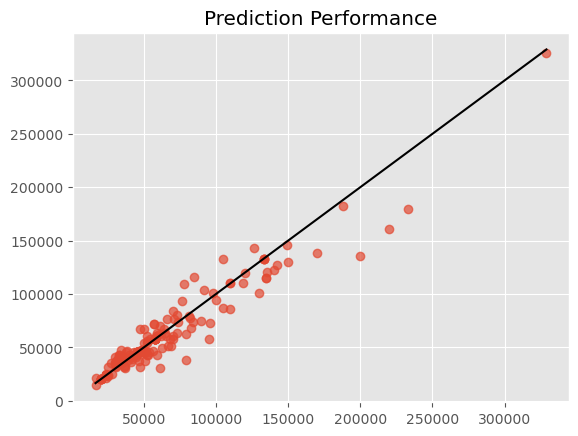

In [76]:
plt.style.use('ggplot')
plt.plot(y_test,y_pred,'o',alpha=0.7)
plt.plot([(y_test.min()),(y_test.max())],[(y_test.min()),(y_test.max())],color='black')
plt.title('Prediction Performance')

In [77]:
#Better than Last time

#### _Evaluation_

In [136]:
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print("*Model Performance*")
print(f"MAE >> {mae}")
print(f"RMSE >> {rmse}\n")
print('Accuracy 🎯')
print(f"R2 Score >> {r2}")
print(f'Adjusted_R2_score >> {round(1-((1-r2_score(y_test,y_pred))*len(X_train)-1)/(len(X_train)-len(X.columns)-1),2)}')

*Model Performance*
MAE >> 7093.144522091087
RMSE >> 12448.018965186924

Accuracy 🎯
R2 Score >> 0.9150362411613062
Adjusted_R2_score >> 0.91


### Loading the Trained Model for Action!

In [81]:
import pickle
with open('laptop_randomf_model.pkl','wb') as file:
    pickle.dump(model,file)